## Visualizing gene set enrichment analysis results (clusterProfiler) using dotHeatmap

In [1]:
import os,sys
import matplotlib.pylab as plt
import pickle
import glob
import numpy as np
import matplotlib as mpl
import pandas as pd
mpl.style.use('default')
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'Arial'
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi']=300
import pickle
sys.path.append(os.path.expanduser("~/Projects/Github/PyComplexHeatmap"))
import PyComplexHeatmap
print(PyComplexHeatmap.__version__)
from PyComplexHeatmap import *

1.7.2.dev0+g8abf70a.d20240415


### Read data

In [2]:
with open("../data/anno_img_example.pickle",'rb') as f:
    data,df_row,df_col,colors=pickle.load(f)

In [3]:
data

MajorType    Gene      frac    median
0         ASC   Bach1  0.141686  0.755535
1         ASC  Barhl1  0.977752  0.114052
2         ASC    Ebf1  0.000000  0.701078
3         ASC    Ebf4  0.221311  0.616565
4         ASC    Emx1  0.748244  0.370591
..        ...     ...       ...       ...
589  VLMC-Pia   Sox10  0.393939  0.584046
590  VLMC-Pia    Sox8  0.661616  0.388624
591  VLMC-Pia    Spi1  0.075758  0.728079
592  VLMC-Pia    Tcf4  0.005051  0.733103
593  VLMC-Pia  Zbtb43  0.272727  0.685164

[594 rows x 4 columns]

In [4]:
df_row

groupA  auc_score        FC  DeltaMean               ID  \
Gene                                                                 
Nfia          ASC   0.867084  0.767527  -0.149461         ASC|Nfia   
Tcf4      CGE-Vip   0.941525  0.508175  -0.282496     CGE-Vip|Tcf4   
Erg            EC   0.905526  0.857981  -0.114057           EC|Erg   
Fli1           EC   0.865978  0.747177  -0.171242          EC|Fli1   
Zbtb43        Exc   0.685494  0.784200  -0.144034       Exc|Zbtb43   
Mef2c       IT-L6   0.801657  0.680693  -0.177612      IT-L6|Mef2c   
Spi1          MGC   0.834667  0.736412  -0.185941         MGC|Spi1   
Hdx           MGC   0.761553  0.852639  -0.120034          MGC|Hdx   
Bach1   MGE-Pvalb   0.661613  0.855795  -0.100834  MGE-Pvalb|Bach1   
Sox10         ODC   0.898168  0.280051  -0.354296        ODC|Sox10   
Sox8          ODC   0.823024  0.361547  -0.215307         ODC|Sox8   
Emx1            P   0.698043  0.655946  -0.114102           P|Emx1   
Lhx2            P   0.698424  0.623909  -0.101292           P|Lhx2   
Lhx3            P   0.716947  0.550733  -0.109488           P|Lhx3   
Pou5f1          P   0.678675  0.800837  -0.124454         P|Pou5f1   
Barhl1          P   0.794566  0.469806  -0.116628         P|Barhl1   
Emx2            P   0.703207  0.522485  -0.105113           P|Emx2   
Hnf1b          PC   0.725118  0.793915  -0.115062         PC|Hnf1b   
Ebf4           PC   0.734220  0.797483  -0.125697          PC|Ebf4   
Ebf1           PC   0.926915  0.821295  -0.125705          PC|Ebf1   
Ovol2          PC   0.668495  0.775894  -0.119117         PC|Ovol2   
Ikzf2          PC   0.830705  0.830263  -0.130275         PC|Ikzf2   

                                                     Logo  
Gene                                                       
Nfia    https://motifcollections.aertslab.org/v10nr_cl...  
Tcf4    https://motifcollections.aertslab.org/v10nr_cl...  
Erg     https://motifcollections.aertslab.org/v10nr_cl...  
Fli1    https://motifcollections.aertslab.org/v10nr_cl...  
Zbtb43  https://motifcollections.aertslab.org/v10nr_cl...  
Mef2c   https://motifcollections.aertslab.org/v10nr_cl...  
Spi1    https://motifcollections.aertslab.org/v10nr_cl...  
Hdx     https://motifcollections.aertslab.org/v10nr_cl...  
Bach1   https://motifcollections.aertslab.org/v10nr_cl...  
Sox10   https://motifcollections.aertslab.org/v10nr_cl...  
Sox8    https://motifcollections.aertslab.org/v10nr_cl...  
Emx1    https://motifcollections.aertslab.org/v10nr_cl...  
Lhx2    https://motifcollections.aertslab.org/v10nr_cl...  
Lhx3    https://motifcollections.aertslab.org/v10nr_cl...  
Pou5f1  https://motifcollections.aertslab.org/v10nr_cl...  
Barhl1  https://motifcollections.aertslab.org/v10nr_cl...  
Emx2    https://motifcollections.aertslab.org/v10nr_cl...  
Hnf1b   https://motifcollections.aertslab.org/v10nr_cl...  
Ebf4    https://motifcollections.aertslab.org/v10nr_cl...  
Ebf1    https://motifcollections.aertslab.org/v10nr_cl...  
Ovol2   https://motifcollections.aertslab.org/v10nr_cl...  
Ikzf2   https://motifcollections.aertslab.org/v10nr_cl...

In [5]:
df_col

CellClass
MajorType          
ASC            NonN
MGC            NonN
UL-P2             P
MGE-MN            P
DL-P2             P
IT-L5           Exc
MGE-Pvalb       Inh
UL-P1             P
CT-L6           Exc
IT-L6           Exc
EC             NonN
OPC            NonN
ODC            NonN
MGE-Sst         Inh
DL-P1             P
ET-L5           Exc
NP-L6           Exc
CGE-Lamp5       Inh
IT-L23          Exc
VLMC           NonN
IT-L4           Exc
CGE-Vip         Inh
PC             NonN
CGE-MN            P
Exc-Unk         Exc
VLMC-Pia       NonN
L6b             Exc

### Plot

In [6]:
# # download image to local
# import requests
# img_dir='images'
# if not os.path.exists(img_dir):
#     os.mkdir(img_dir)
# for url in df_row.Logo.tolist():
#     img_data = requests.get(url).content
#     file=os.path.basename(url)
#     with open(os.path.join(img_dir,file), 'wb') as handler:
#         handler.write(img_data)

In [7]:
img_dir='images'
df_row.Logo=df_row.Logo.apply(lambda x:os.path.join(img_dir,os.path.basename(x)))
df_row

groupA  auc_score        FC  DeltaMean               ID  \
Gene                                                                 
Nfia          ASC   0.867084  0.767527  -0.149461         ASC|Nfia   
Tcf4      CGE-Vip   0.941525  0.508175  -0.282496     CGE-Vip|Tcf4   
Erg            EC   0.905526  0.857981  -0.114057           EC|Erg   
Fli1           EC   0.865978  0.747177  -0.171242          EC|Fli1   
Zbtb43        Exc   0.685494  0.784200  -0.144034       Exc|Zbtb43   
Mef2c       IT-L6   0.801657  0.680693  -0.177612      IT-L6|Mef2c   
Spi1          MGC   0.834667  0.736412  -0.185941         MGC|Spi1   
Hdx           MGC   0.761553  0.852639  -0.120034          MGC|Hdx   
Bach1   MGE-Pvalb   0.661613  0.855795  -0.100834  MGE-Pvalb|Bach1   
Sox10         ODC   0.898168  0.280051  -0.354296        ODC|Sox10   
Sox8          ODC   0.823024  0.361547  -0.215307         ODC|Sox8   
Emx1            P   0.698043  0.655946  -0.114102           P|Emx1   
Lhx2            P   0.698424  0.623909  -0.101292           P|Lhx2   
Lhx3            P   0.716947  0.550733  -0.109488           P|Lhx3   
Pou5f1          P   0.678675  0.800837  -0.124454         P|Pou5f1   
Barhl1          P   0.794566  0.469806  -0.116628         P|Barhl1   
Emx2            P   0.703207  0.522485  -0.105113           P|Emx2   
Hnf1b          PC   0.725118  0.793915  -0.115062         PC|Hnf1b   
Ebf4           PC   0.734220  0.797483  -0.125697          PC|Ebf4   
Ebf1           PC   0.926915  0.821295  -0.125705          PC|Ebf1   
Ovol2          PC   0.668495  0.775894  -0.119117         PC|Ovol2   
Ikzf2          PC   0.830705  0.830263  -0.130275         PC|Ikzf2   

                                                     Logo  
Gene                                                       
Nfia                          images/jaspar__MA0670.1.png  
Tcf4                         images/tfdimers__MD00119.png  
Erg                          images/metacluster_135.7.png  
Fli1                         images/metacluster_135.7.png  
Zbtb43                       images/metacluster_131.8.png  
Mef2c                     images/transfac_pro__M04846.png  
Spi1                         images/metacluster_167.5.png  
Hdx                          images/tfdimers__MD00488.png  
Bach1                         images/jaspar__MA1633.2.png  
Sox10                          images/metacluster_4.1.png  
Sox8                           images/metacluster_4.1.png  
Emx1                         images/metacluster_164.1.png  
Lhx2                         images/metacluster_164.1.png  
Lhx3                          images/metacluster_9.26.png  
Pou5f1  images/taipale_cyt_meth__POU5F1_NYTAATTATGCGNR...  
Barhl1                       images/metacluster_124.2.png  
Emx2                         images/metacluster_164.1.png  
Hnf1b                        images/tfdimers__MD00345.png  
Ebf4                        images/metacluster_172.20.png  
Ebf1                        images/metacluster_172.20.png  
Ovol2                        images/tfdimers__MD00481.png  
Ikzf2                        images/tfdimers__MD00008.png

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Inferred max_s (max size of scatter point) is: 123.77287453405835
Plotting legends..


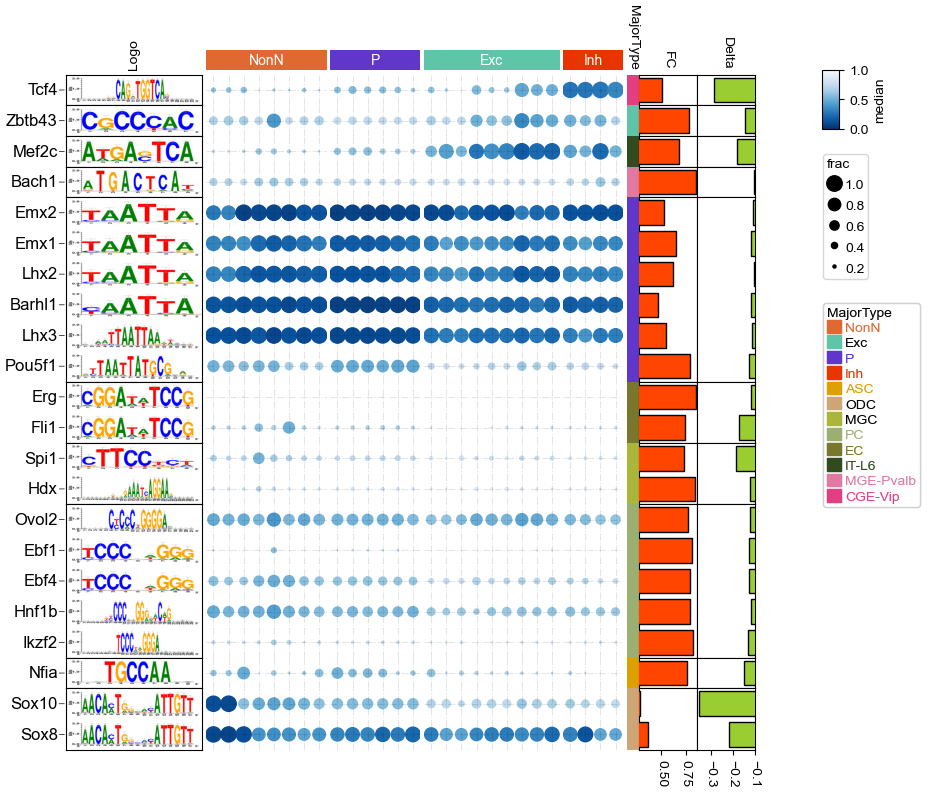

In [8]:
left_ha = HeatmapAnnotation(
    label=anno_label(df_row.index.to_series(), merge=True,rotation=0,relpos=(1,0.5),arrowprops=dict(visible=True),
                  fontsize=12,luminance=0.8,height=2,colors='black'),
    Logo=anno_img(df_row.Logo,border_width=0,height=35,
                 ),
    axis=0, verbose=0,orientation='left',#label_kws={'horizontalalignment': 'left', 'visible': True}
)

right_ha = HeatmapAnnotation(
    # Logo=anno_img(df_row.Logo,border_width=5,border_color=255,height=25,invert_x=False,invert_y=False),
    MajorType=anno_simple(df_row.groupA, add_text=False, legend=True, colors=colors),
    FC=anno_barplot(df_row.FC,colors='orangered',legend=False,height=15),
    Delta=anno_barplot(df_row.DeltaMean,colors='yellowgreen',legend=False,height=15),
    axis=0, verbose=0, #label_kws={'horizontalalignment': 'left', 'visible': True}
)

col_ha = HeatmapAnnotation(
    CellClass=anno_simple(df_col.CellClass, colors=colors,legend=False, add_text=True,height=4.5),
    verbose=0, label_side='right', label_kws={'horizontalalignment': 'left','visible':False})

plt.figure(figsize=(9, 8))
cm = DotClustermapPlotter(data=data, x='MajorType', y='Gene', value='median', c='median',
                          s='frac',cmap='Blues_r',
                          row_cluster=True, col_cluster=True, #hue='Group',
                          # cmap={'Group1': 'Greens', 'Group2': 'OrRd'},
                          vmin=0, vmax=1,
                          # colors={'Group1': 'yellowgreen', 'Group2': 'orange'},
                          # marker={'Group1': '*', 'Group2': '$\\ast$'},
                          #show_rownames=True, show_colnames=True, row_dendrogram=False,
                          #col_names_side='bottom',  row_names_side='left',
                          xticklabels_kws={'labelrotation': -90, 'labelcolor': 'blue', 'labelsize': 14},
                          yticklabels_kws={'labelcolor': 'black', 'labelsize': 14},
                          top_annotation=col_ha, right_annotation=right_ha,left_annotation=left_ha,
                          spines=False,
                          row_split=df_row.groupA, row_split_gap=0,
                          col_split=df_col.CellClass, col_split_gap=0.8,
                          verbose=1, legend_gap=6,legend_hpad=0,legend_width=28,
                          # dot_legend_marker='*',
                          # xlabel=Group,xlabel_side="top",
                          # xlabel_kws=dict(labelpad=8,fontweight='bold'),
                          # xlabel_bbox_kws=dict(facecolor=facecolor)
                          )
for ax in cm.heatmap_axes.ravel():
    ax.grid(axis='both', which='major', color='black', linestyle='dashdot', alpha=0.1,zorder=-10)
# plt.savefig(f"{outname}.dotHeatmap.pdf",bbox_inches='tight')
plt.show()

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Inferred max_s (max size of scatter point) is: 147.95012429626675
Plotting legends..


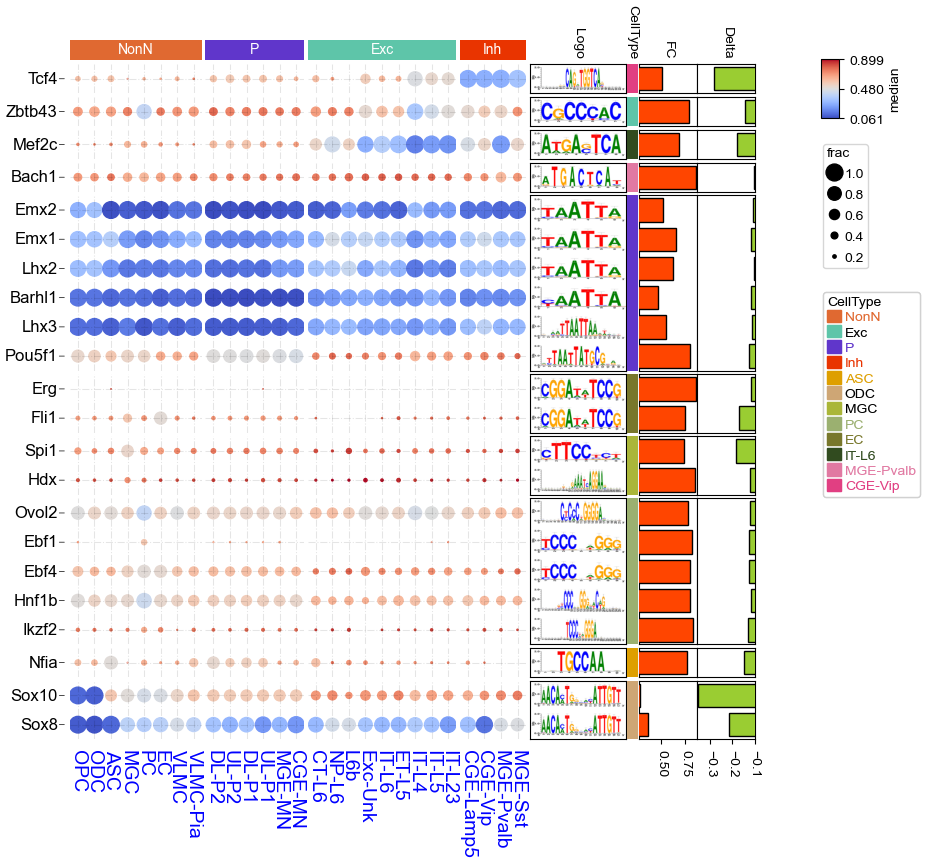

In [9]:
left_ha = HeatmapAnnotation(
    label=anno_label(df_row.index.to_series(), merge=True,rotation=0,relpos=(1,0.5),arrowprops=dict(visible=True),
                  fontsize=12,luminance=0.8,height=2,colors='black'),
    # Logo=anno_img(df_row.Logo,border_width=0,border_color=255,height=35,rotate=180),
    axis=0, verbose=0,orientation='left',#label_kws={'horizontalalignment': 'left', 'visible': True}
)

right_ha = HeatmapAnnotation(
    Logo=anno_img(df_row.Logo,border_width=1,height=25),
    CellType=anno_simple(df_row.groupA, add_text=False, legend=True, colors=colors),
    FC=anno_barplot(df_row.FC,colors='orangered',legend=False,height=15),
    Delta=anno_barplot(df_row.DeltaMean,colors='yellowgreen',legend=False,height=15),
    axis=0, verbose=0, #label_kws={'horizontalalignment': 'left', 'visible': True}
)

col_ha = HeatmapAnnotation(
    CellClass=anno_simple(df_col.CellClass, colors=colors,legend=False, add_text=True,height=4.5),
    verbose=0, label_side='right', label_kws={'horizontalalignment': 'left','visible':False})

plt.figure(figsize=(9, 8))
cm = DotClustermapPlotter(data=data, x='MajorType', y='Gene', value='median', c='median',
                          s='frac',cmap='coolwarm',
                          row_cluster=True, col_cluster=True, #hue='Group',
                          # cmap={'Group1': 'Greens', 'Group2': 'OrRd'},
                          # vmin=0, vmax=1,
                          # colors={'Group1': 'yellowgreen', 'Group2': 'orange'},
                          # marker={'Group1': '*', 'Group2': '$\\ast$'},
                          show_colnames=True, #show_colnames=True, row_dendrogram=False,
                          col_names_side='bottom',  row_names_side='left',
                          xticklabels_kws={'labelrotation': -90, 'labelcolor': 'blue', 'labelsize': 14},
                          yticklabels_kws={'labelcolor': 'black', 'labelsize': 14},
                          top_annotation=col_ha, right_annotation=right_ha,left_annotation=left_ha,
                          spines=False,
                          row_split=df_row.groupA, row_split_gap=0.8,
                          col_split=df_col.CellClass, col_split_gap=0.8,
                          verbose=1, legend_gap=6,legend_hpad=0,legend_width=28,
                          # dot_legend_marker='*',
                          # xlabel=Group,xlabel_side="top",
                          # xlabel_kws=dict(labelpad=8,fontweight='bold'),
                          # xlabel_bbox_kws=dict(facecolor=facecolor)
                          )
for ax in cm.heatmap_axes.ravel():
    ax.grid(axis='both', which='major', color='black', linestyle='dashdot', alpha=0.1,zorder=-10)

# ax=right_ha.annotations[0].ax
# ax.xaxis.set_visible(True) # show ticks
# ax.tick_params(
#     axis="x", which="both", bottom=True, labelbottom=True
# )
# for side in ["top", "right", "left", "bottom"]:
#     ax.set_axis_on()
#     ax.spines[side].set_visible(True)
#     ax.spines[side].set_color('red')
#     ax.spines[side].set_linewidth(1)
#     ax.spines[side].set_linestyle('--')
plt.savefig("motif_tf.dotHeatmap.pdf",bbox_inches='tight')
plt.show()